In [1]:
#import libraries
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob

In [2]:
#pull the data
df = pd.read_csv('Newsdata.csv',encoding='latin-1')
df

,Serial Number,Sentiment,Review
0,1,neutral,"According to Gran , the company has no plans t..."
1,2,neutral,Technopolis plans to develop in stages an area...
2,3,negative,The international electronic industry company ...
3,4,positive,With the new production plant the company woul...
4,5,positive,According to the company 's updated strategy f...
...,...,...,...
4843,4844,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,4845,negative,Net sales of the Paper segment decreased to EU...
4845,4846,negative,Sales in Finland decreased by 10.5 % in Januar...
4846,4847,palistve,this is ideal meaaena visa


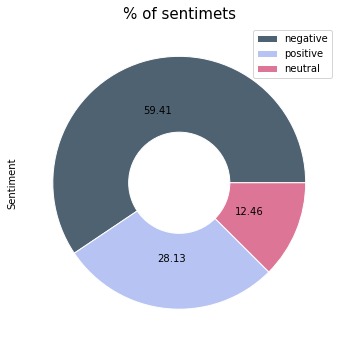

In [3]:
#Pie chart
colors = ['#4F6272', '#B7C3F3', '#DD7596']
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.Sentiment.value_counts().head(3).plot(kind='pie', labels=None, autopct='%.2f', ax=ax1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors).legend(labels={
                     "neutral",
                     "positive",
                     "negative"})
central_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('% of sentimets', size=15)
plt.tight_layout()
plt.show()

In [4]:
reviews = []
with open('Newsdata.csv', 'r', encoding='ISO-8859-1') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # skip the header row
    for row in csvreader:
        reviews.append(row[1])  # append the review text to the list

In [5]:
# perform sentiment analysis on each review using TextBlob
sentiments = []
for review in reviews:
    blob = TextBlob(review)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)



In [6]:
# Discretize the continuous sentiment scores
sentiments = np.array(sentiments)
threshold = 0.0
sentiments = np.where(sentiments > threshold, 1, 0)

# Check the unique values in the target variable
unique_sentiments = np.unique(sentiments)
print("Unique Sentiment Values:", unique_sentiments)

Unique Sentiment Values: [0 1]


In [7]:
 #Extract features using TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(reviews).toarray()

# Split the data into train and test sets
split_ratio = 0.7
split_idx = int(split_ratio * len(X))
train_X, test_X = X[:split_idx], X[split_idx:]
train_y, test_y = sentiments[:split_idx], sentiments[split_idx:]

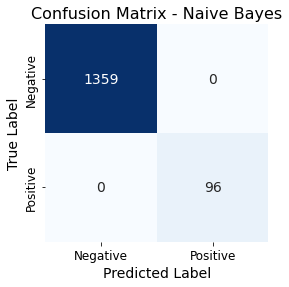

In [8]:
# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(train_X, train_y)

# Predict sentiment of test reviews using Naive Bayes classifier
test_y_pred_nb = nb.predict(test_X)

# Create confusion matrix for Naive Bayes classifier
cm_nb = confusion_matrix(test_y, test_y_pred_nb)

# Plot confusion matrix for Naive Bayes classifier
plt.figure(figsize=(4, 4))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={'fontsize':14}, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - Naive Bayes', fontsize=16)
plt.show()

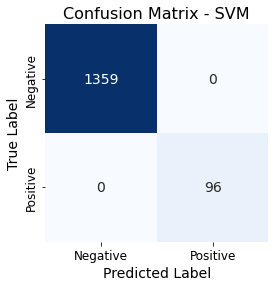

In [9]:
# Train a SVM classifier
svm = SVC(decision_function_shape='ovr')
svm.fit(train_X, train_y)

# Predict sentiment of test reviews using SVM classifier
test_y_pred_svm = svm.predict(test_X)

# Create confusion matrix for SVM classifier
cm_svm = confusion_matrix(test_y, test_y_pred_svm)

# Plot confusion matrix for SVM classifier
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={'fontsize':14}, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix - SVM', fontsize=16)
plt.show()

In [10]:
# Predict sentiment using the ensemble classifier
test_y_pred_nb = nb.predict(X)
test_y_pred_svm = svm.predict(X)
ensemble_y_pred = np.where((test_y_pred_nb + test_y_pred_svm) > 1, 1, 0)
sentiment_scores = []
for i in range(len(X)):
    sentiment_scores.append(2 * ensemble_y_pred[i] - 1)

print(sentiment_scores)


[-1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 

In [11]:
# Predict sentiment of test reviews using all three classifiers
test_y_pred_nb = nb.predict(test_X)
test_y_pred_svm = svm.predict(test_X)

# Combine the predictions using majority vote
test_y_pred = np.where((test_y_pred_nb + test_y_pred_svm) > 1, 2, 0)

# Calculate accuracy
ensemble_accuracy = accuracy_score(test_y, test_y_pred) * 100
print("ESNB Classifier Accuracy: {:.2f}%".format(ensemble_accuracy))

ESNB Classifier Accuracy: 93.40%


In [12]:
sentiment_polarity = sum(sentiments)/len(sentiments)

# Determine the overall sentiment polarity based on the average polarity
if sentiment_polarity > 0:
    overall_sentiment = "Positive"
elif sentiment_polarity == 0:
    overall_sentiment = "Neutral"
else:
    overall_sentiment = "Negative"
    
# Print the overall sentiment polarity
print("The overall sentiment polarity of the news articles is:", overall_sentiment)

The overall sentiment polarity of the news articles is: Positive
